In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Minor Project\ML\exercise_recommendation_dataset1.csv")

In [3]:
dataset.head(3)

,bmi,duration,exercise
0,47.09,62,hightIntensityCardio_circuit
1,19.22,15,HeavyEndurance
2,31.30,118,hightIntensityCardio_circuit


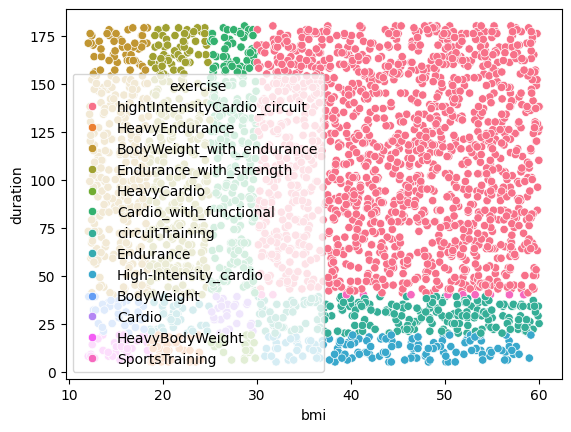

In [4]:
sns.scatterplot(x='bmi',y='duration',data=dataset, hue='exercise')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
dataset["exercise"] = le.fit_transform(dataset["exercise"])

In [8]:
dataset.head()

,bmi,duration,exercise
0,47.09,62,12
1,19.22,15,8
2,31.30,118,12
3,17.28,103,1
4,21.41,76,5


In [9]:
x = dataset.iloc[:,:-1]
y = dataset["exercise"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')

In [14]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
rfc.score(x_test,y_test)*100, rfc.score(x_train,y_train)*100

(99.16666666666667, 100.0)

In [16]:
# import joblib

In [17]:
# joblib.dump(rfc,'new_exercise_recommendation_model.pkl')

In [18]:
for label,number in zip(le.classes_,range(len(le.classes_))):
    print(f"{label} -> {number}")

BodyWeight -> 0
BodyWeight_with_endurance -> 1
Cardio -> 2
Cardio_with_functional -> 3
Endurance -> 4
Endurance_with_strength -> 5
HeavyBodyWeight -> 6
HeavyCardio -> 7
HeavyEndurance -> 8
High-Intensity_cardio -> 9
SportsTraining -> 10
circuitTraining -> 11
hightIntensityCardio_circuit -> 12


In [19]:
rfc.predict([[45,20]])

C:\python1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([11])

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

In [21]:
cm = confusion_matrix(y_test,rfc.predict(x_test))

In [22]:
cm

array([[  4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,  76,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   7,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   4,  68,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  12,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  11,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 285]])

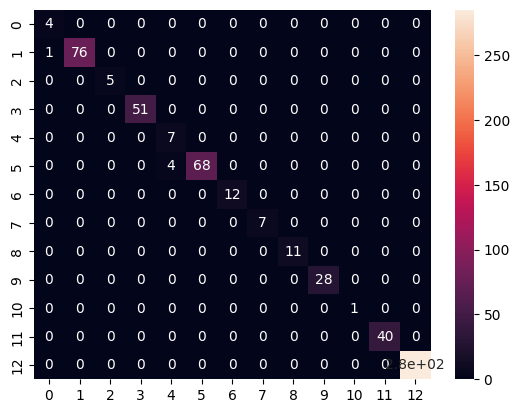

In [23]:
sns.heatmap(cm,annot=True)
plt.show()